# Introduction

We conduct a data analysis on the [Titanic data set](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) from the 
[Kaggle website](https://www.kaggle.com/c/titanic/data). This notebook collects the code used to perform the analysis and presents our findings. The goal of our analysis is to identify factors that made the passengers more likely to survive.

We address the following questions - note that passenger class is a proxy for socio-economic status:

1. Did non-socio-economic factors determine the likelihood of survival? We consider the passenger's sex and age.
2. Did socio-economic factors determine the likelihood of survial? We consider the passenger's class (i.e. 1st, 2nd, or 3rd class).
3. How did passengers with families (either parents, children, or siblings) survive compared to those without families?

# Importing Required Libraries and Loading the Data Set

In [1]:
## Set up the environment

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
## Load the data set

titanic_df = pd.read_csv('titanic_data.csv')

# Initial Inspection of the Data

In [3]:
## Let's see what the data looks like
## First let's see what the columns are.

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
## Let's look at the first few rows of data.

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
## Let's look at some basic statistics for the data.

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


An initial inspection of the data shows us that we have data for 891 passengers not all of whose ages are known. Passengers in 2nd and 3rd class do not appear to have cabins assigned to them. The majority of the passengers (in the data set) were in 3rd class. This is based on the upper 50th percentile for ```pclass``` being 3 so the lower 50th percentile must include the 1st and 2nd class passengers combined. It would appear that the most interesting/relevant factors to look at are: ```Survived```, ```Sex```, ```Pclass```, and ```Age```. The variables ```SibSp``` and ```Parch``` can help us address the third question.

# Correlations Between Features

We look at correlations between the numerical features to see if there are any especially strong correlations.
See the Seaborn documentation [here](http://seaborn.pydata.org/examples/many_pairwise_correlations.html) for details about the correlation matrix.

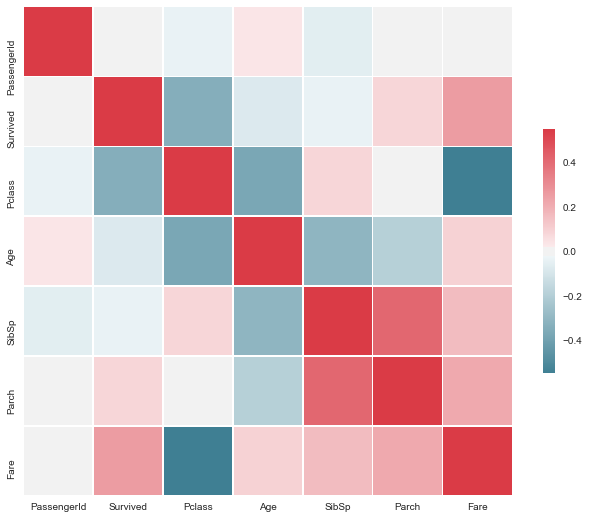

In [6]:
# Please note that I copied and pasted thecode below from the above link

# Compute the correlation matrix
corr = titanic_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=None, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

There are no surprising strong correlations. There is a negative correlation between `Survived` and `Pclass`.
The next area to explore is differences between males and females.

# Exploration of Data by Gender

According to maritime custom, women and children were to be given [priority for lifeboat seating](https://en.wikipedia.org/wiki/Women_and_children_first) when abandoning ship. Therefore, we should expect to see some differences in survival rate for females and males.

male      577
female    314
Name: Sex, dtype: int64


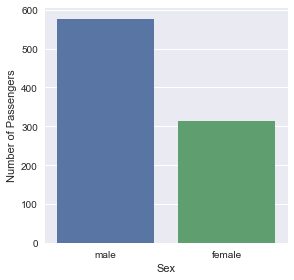

In [7]:
# Let's start by counting how many females and males we have.

print titanic_df['Sex'].value_counts()

# Let's also look at a bar graph for comparison.

mf_plot = sns.factorplot('Sex', data=titanic_df, kind='count')
mf_plot.set_ylabels("Number of Passengers")

We see that there are almost twice as many male passengers as female passengers in the data set. Keep this in mind when we look at survival rates for males and females. 

Next, we break down the passenger list by gender and class.

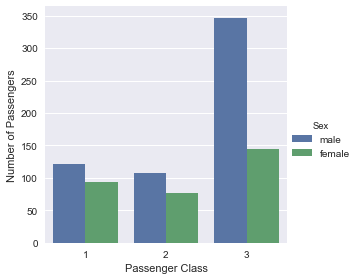

In [8]:
# Create a bar chart breaking down the passengers by gender and class

mf_class_plot= sns.factorplot('Pclass',order=[1,2,3], data=titanic_df, hue='Sex', kind='count')
mf_class_plot.set_xlabels("Passenger Class")
mf_class_plot.set_ylabels("Number of Passengers")

For this dataset, the majority of males were in 3rd class, whereas the females appear to be more evenly spread amongst the three classes. Although, there are still more females in 3rd class, than in 1st or 2nd class.

# Exploration of Data by Age

We should also look at passenger age as factor of survival. Since children were also given priority to seats on lifeboats, we should expect a higher survival rate for children than for adults. For the purpose of this analysis, I will assume that the maximum age for a child was 12, based on the discussion [here](https://www.encyclopedia-titanica.org/community/threads/age-of-majority.4620/).

Youngest Passenger Age: 0.42
Oldest Passenger Age: 80.0
Mean Passenger Age: 29.6991176471
Median Passenger Age: 28.0


[<matplotlib.text.Text at 0xc63ffd0>, <matplotlib.text.Text at 0xc5cb4e0>]

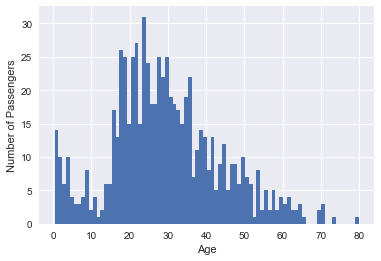

In [9]:
# Spread of passenger ages
print "Youngest Passenger Age: " + str(titanic_df['Age'].min())
print "Oldest Passenger Age: " + str(titanic_df['Age'].max())
print "Mean Passenger Age: " + str(titanic_df['Age'].mean())
print "Median Passenger Age: " + str(titanic_df['Age'].median())

# Histogram of ages

age_hist = titanic_df['Age'].hist(bins=80)
age_hist.set(xlabel="Age", ylabel="Number of Passengers")

As noted earlier, some of the ages are missing - 177 records to be exact. We cannot ignore this many rows so we must come up with a way to impute the missing ages. One solution would be to fill in the missing ages with the median ages according to gender. This is not ideal, but it's better than excluding those rows outright.

In [10]:
# Determine the median age for males and for females

print "Median age for males: " + str(titanic_df[titanic_df.Sex == 'male']['Age'].median())
print "Median age for females: " + str(titanic_df[titanic_df.Sex == 'female']['Age'].median())

Median age for males: 29.0
Median age for females: 27.0


Since the median age of all passengers, 28.0, is the median of the above two median ages, we will  fill in the `NaN`s with 28.0.

In [12]:
# Use the above value to impute the missing ages.
# If the age is missing replace `NaN` with 28.0.
# Otherwise, keep the age that is already there.

imputed_age = np.where(titanic_df['Age'].isnull(), 28.0, titanic_df['Age'])

# Replace the `NaN`s with 28.0 otherwise don't replace the age.
titanic_df['Age'] = imputed_age
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I want to determine whether a passenger was an adult or a child. To this end, I add a new column to the data set indicating each passenger's status (at least for those passengers that have an age).

In [14]:
# Define a function that determines whether a passenger is an adult or a child.
# If a passenger is an adult, then that passenger is labeled according to `Sex`.
# Note that if the age is missing (entered as 'Nan' in the Age column), the the passenger will be consdered an adult.

def adult_or_child(passenger):
    age,sex = passenger
    if age <= 12:
        return 'child'
    else:
        return sex

In [15]:
# Add a column called 'Majority' to the data set indicating whether each passenger is an adult or a child.

titanic_df['Majority'] = titanic_df[['Age','Sex']].apply(adult_or_child, axis=1)

In [16]:
# Let's see what our numbers look like now.

titanic_df['Majority'].value_counts()

male      540
female    282
child      69
Name: Majority, dtype: int64

Let's see what the breakdown is for adults and children by class.

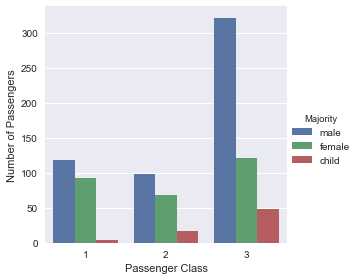

In [17]:
# Create a bar chart breaking down the passengers by gender and class.

majority_class_plot= sns.factorplot('Pclass',order=[1,2,3], data=titanic_df, hue='Majority', kind='count')
majority_class_plot.set_xlabels("Passenger Class")
majority_class_plot.set_ylabels("Number of Passengers")

# Exploration of Data by Family Affiliation

We look at the data to see how many passengers were part of a family and how many traveled alone. I assume that families would try to stay together which could increase the chance of survival of the family group, but might decrease the chance of survival of individuals within the family.

In [18]:
# Define a function that determines whether a passenger is traveling with a family or alone.

def family_or_alone(passenger):
    sibsp,parch = passenger
    if sibsp + parch > 0:
        return 'family'
    else:
        return 'alone'

In [19]:
# Add a column called 'FamAlone' to the data set indicating whether each passenger traveled with a family or alone.

titanic_df['FamAlone'] = titanic_df[['SibSp','Parch']].apply(family_or_alone, axis=1)

In [20]:
# Let's see what the numbers for family affiliation look like.

titanic_df['FamAlone'].value_counts()

alone     537
family    354
Name: FamAlone, dtype: int64

Let's breakdown family affiliation by class.

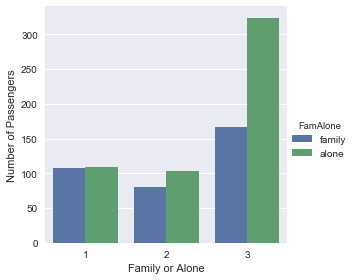

In [21]:
# Create a bar chart breaking down the passengers by family affiliation.

family_plot= sns.factorplot('Pclass',order=[1,2,3], data=titanic_df, hue='FamAlone', kind='count')
family_plot.set_xlabels("Family or Alone")
family_plot.set_ylabels("Number of Passengers")

Looking at the above graph, we see that in 3rd class, more passengers traveled alone whereas in the 1st class and 2nd class, roughly the same number of passengers traveled wth families as did those who traveled alone.

# Survival Rates for Passengers

We calculate the survival rates for passengers based on gender, class, and family affiliation. First we look at the overall survival rate.

In [22]:
# Create a new column `Survivor` which translates the values of `Survived' as follows: 0 becomes 'No' and 1 becomes 'Yes'

titanic_df['Survivor']= titanic_df.Survived.map({0:'No', 1:'Yes'})

# Calculate the proportions of survivors and fatalities.
# Note that normalize = False just returns the nubers rather than the proportions.

titanic_df['Survivor'].value_counts(normalize = True)

No     0.616162
Yes    0.383838
Name: Survivor, dtype: float64

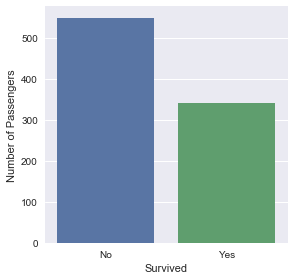

In [23]:
# Plot the numbers of those who survived and didn't.

survival_plot = sns.factorplot('Survivor', data=titanic_df, kind='count')
survival_plot.set_xlabels("Survived")
survival_plot.set_ylabels("Number of Passengers")

Clearly the majority of passengers perished in the data set. Next, we compare survival rates by gender.
Roughly 38% of the passengers survived and 62% didn't.

Next, we'll break down the survival rates by gender, class, and familial affiliation.

## Survival by Gender

In [24]:
# Calculate the proportions of survivors by gender.

gender_survival = titanic_df.groupby(['Sex'])['Survivor']
gender_survival.value_counts(normalize = True)

Sex     Survivor
female  Yes         0.742038
        No          0.257962
male    No          0.811092
        Yes         0.188908
Name: Survivor, dtype: float64

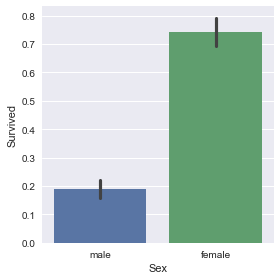

In [25]:
# Graph the above results.

gender_survival_plot = sns.factorplot("Sex", "Survived", data=titanic_df, kind="bar")

There is a notable difference in survival rates between genders with a rate of roughly 74.2% for females and only 18.9% for males.

## Survival by Class

In [27]:
# Calculate the proportions of survivors by class.

class_survival = titanic_df.groupby(['Pclass'])['Survivor']
class_survival.value_counts(normalize = True)

Pclass  Survivor
1       Yes         0.629630
        No          0.370370
2       No          0.527174
        Yes         0.472826
3       No          0.757637
        Yes         0.242363
Name: Survivor, dtype: float64

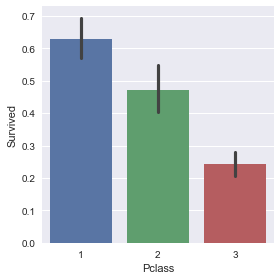

In [28]:
# Graph the above results.

class_survival_plot = sns.factorplot("Pclass", "Survived", data=titanic_df, kind="bar")

There are notable differences in survival rates between passenger classes with a survival rate of greater than 50% for first class passengers, less than 50% for second class passengers, and less than 25% for third class passengers.

### Survival by Gender within Classes

In [29]:
# Calculate the proportions of survivors by class and gender.

class_gender_survival = titanic_df.groupby(['Pclass','Sex'])['Survivor']
class_gender_survival.value_counts(normalize = True)

Pclass  Sex     Survivor
1       female  Yes         0.968085
                No          0.031915
        male    No          0.631148
                Yes         0.368852
2       female  Yes         0.921053
                No          0.078947
        male    No          0.842593
                Yes         0.157407
3       female  No          0.500000
                Yes         0.500000
        male    No          0.864553
                Yes         0.135447
Name: Survivor, dtype: float64

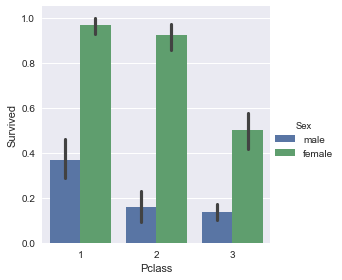

In [30]:
# Graph the results from above

sns.factorplot("Pclass", "Survived",order=[1,2,3],data=titanic_df,hue='Sex', kind='bar')

We observe that females in a particular class had noticeably greater surival rates than males in the same class. In first class, the rate of survial for females was greater than 96% (but slightly uunder 32% for males). In second class, the rate of survial for females was greater than 92% (but slightly under 16% for males). In third class, the rate of survial for females was roughly 50% (but under 14% for males).

## Survival by Familial Affiliation

In [31]:
# Calculate the proportions of survivors by family affiliation.

class_survival = titanic_df.groupby(['FamAlone'])['Survivor']
class_survival.value_counts(normalize = True)

FamAlone  Survivor
alone     No          0.696462
          Yes         0.303538
family    Yes         0.505650
          No          0.494350
Name: Survivor, dtype: float64

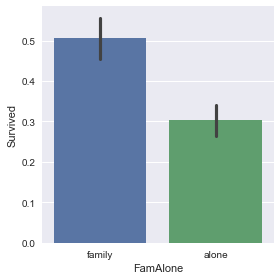

In [32]:
# Graph the results from above.

class_survival_plot = sns.factorplot("FamAlone", "Survived", data=titanic_df, kind="bar")

Those who traveled alone had a survival rate of roughly 30.4%, whereas those who traveled with families had a survival rate of roughly 50.6%. Let's break this down further by class.

In [33]:
# Calculate the proportions of survivors by class and familial affiliation.

class_family_survival = titanic_df.groupby(['Pclass','FamAlone'])['Survivor']
class_family_survival.value_counts(normalize = True)

Pclass  FamAlone  Survivor
1       alone     Yes         0.532110
                  No          0.467890
        family    Yes         0.728972
                  No          0.271028
2       alone     No          0.653846
                  Yes         0.346154
        family    Yes         0.637500
                  No          0.362500
3       alone     No          0.787037
                  Yes         0.212963
        family    No          0.700599
                  Yes         0.299401
Name: Survivor, dtype: float64

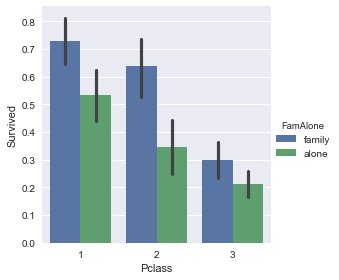

In [34]:
# Graph the results from above

sns.factorplot("Pclass", "Survived",order=[1,2,3],data=titanic_df,hue='FamAlone', kind='bar')

We observe that passengers in families survived at higher rates than those who traveled alone, irrespective of class.

## Survival by Age

Finally, we look at survival rates by age. First let's look at the raw data, then compare survival rates by class.

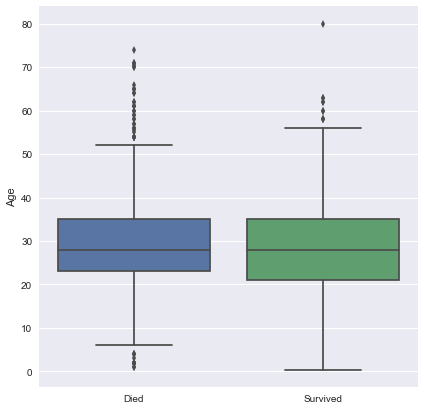

In [46]:
# Graph the box plots for the ages.

age_survival_box_plot = sns.factorplot("Survived", "Age", data=titanic_df, kind="box", size=6)
age_survival_box_plot.set( xlabel='', xticklabels = ['Died', 'Survived'])

Let's compare survival rates by class.

In [53]:
# Calculate the proportions of survivors by class and familial affiliation.

class_family_survival = titanic_df.groupby(['Pclass','Majority'])['Survivor']
class_family_survival.value_counts(normalize = True)

Pclass  Majority  Survivor
1       child     Yes         0.750000
                  No          0.250000
        female    Yes         0.978495
                  No          0.021505
        male      No          0.647059
                  Yes         0.352941
2       child     Yes         1.000000
        female    Yes         0.911765
                  No          0.088235
        male      No          0.919192
                  Yes         0.080808
3       child     No          0.583333
                  Yes         0.416667
        female    Yes         0.504132
                  No          0.495868
        male      No          0.881988
                  Yes         0.118012
Name: Survivor, dtype: float64

Children in first and second classes had much higher survival rates than children in third class. Similarly women in first and second classes fared better than women in third class. Men in first class had a notably higher rate of survival than men in second and third classes.

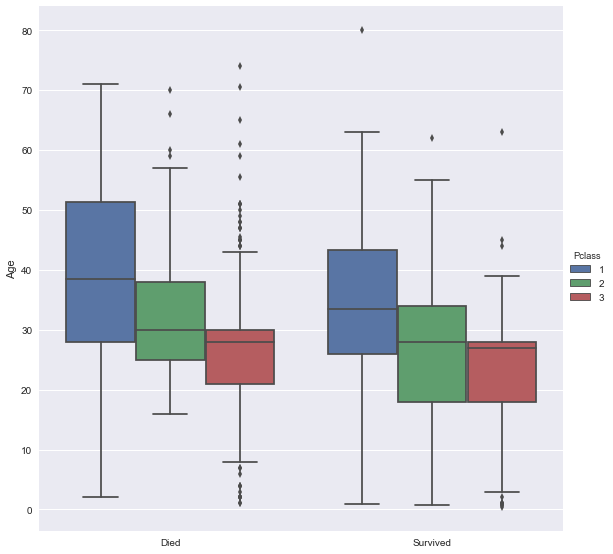

In [54]:
# Graph the box plots for the ages by class.

majority_survival_box_plot = sns.factorplot("Survived", "Age", data=titanic_df, kind="box", size=8, hue='Pclass')
majority_survival_box_plot.set( xlabel='', xticklabels = ['Died', 'Survived'])

Comparing the box plots, it appears that the younger passengers in each class were the majority of survivors.

# Conclusions

Without doing any statistical tests, we can only observe trends. It would appear that passenger class is the strongest determiner of survival with first class passengers having the highest rates of survival. Also, women and children had higher rates of survial than men.

## Limitations of the Analysis

We were supposed to analyze data for the passengers of the titanic, however we were given an incomplete set of data. There were over 2200 people on board (around 1300 passengers and around 900 crew), so it is hard to draw conclusions based on the 891 poeple in the given data set. Also, many ages were missing. This makes drawing conclusions based on age difficult.

Not knowing most of the cabin numbers prevent us from exploring whether cabin location had an effect on survival - although, we can't really assume that most of the passengers were in their cabins when the ship struck the iceberg. To really do this analysis, we would need to know where passengers were at the time the ship struck the iceberg.

Lastly, there are other factors which are more intangible. For example, despite depictions in film, third class passengers were not locked down below deck and women and children denied access to lifeboats.

# Resources

* [Titanic Wikipedia Article](https://en.wikipedia.org/wiki/RMS_Titanic)
* [False Rumors about the Titanic](http://www.grunge.com/31543/false-facts-titanic-always-thought-true/)
* [Seaborn Documentation](http://seaborn.pydata.org/api.html)